Converged after 2352 iterations.


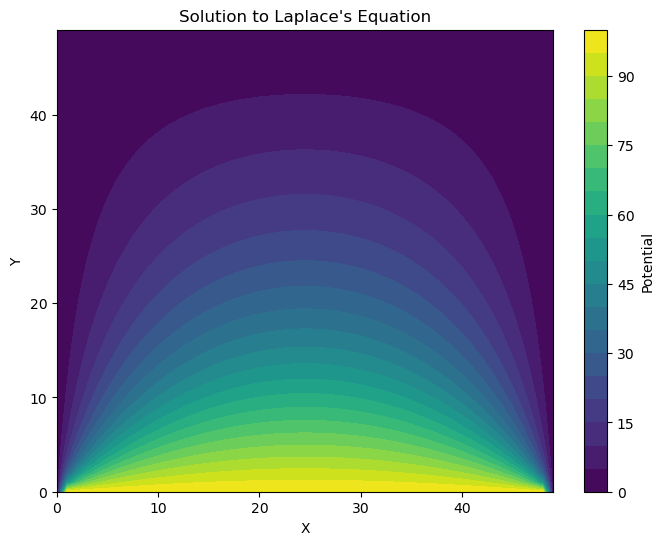

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_laplace(nx, ny, tol=1e-5, max_iter=10000):
    """
    Solve Laplace's equation on a 2D grid using the Gauss-Seidel method.

    Parameters:
        nx, ny: number of grid points in x and y directions
        tol: convergence tolerance
        max_iter: maximum number of iterations

    Returns:
        u: 2D array with the potential values
    """

    # Initialize the grid
    u = np.zeros((ny, nx))

    # Set boundary conditions
    # For example: top boundary = 100, others = 0
    u[0, :] = 100   # Top boundary
    u[-1, :] = 0    # Bottom boundary
    u[:, 0] = 0     # Left boundary
    u[:, -1] = 0    # Right boundary

    # Create a copy to check for convergence
    u_old = u.copy()

    for iteration in range(max_iter):
        # Update interior points
        for i in range(1, ny - 1):
            for j in range(1, nx - 1):
                u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])

        # Check for convergence
        diff = np.max(np.abs(u - u_old))
        if diff < tol:
            print(f'Converged after {iteration} iterations.')
            break
        u_old = u.copy()

    else:
        print('Did not converge within the maximum number of iterations.')

    return u

# Parameters
nx, ny = 50, 50  # Grid size
potential = solve_laplace(nx, ny)

# Plotting the result
plt.figure(figsize=(8,6))
plt.contourf(potential, 20, cmap='viridis')
plt.colorbar(label='Potential')
plt.title('Solution to Laplace\'s Equation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()